<a href="https://colab.research.google.com/github/Eeshan2001/Code_Monk_Task/blob/main/Task-1/Task_1_Crop_production.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the Dataset
df = pd.read_csv('crop_production.csv')

# Step 2: Explore the Dataset
print(df.head())
print(df.info())
print(df.describe())



                    State_Name District_Name  Crop_Year       Season  \
0  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
4  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    

                  Crop    Area  Production  
0             Arecanut  1254.0      2000.0  
1  Other Kharif pulses     2.0         1.0  
2                 Rice   102.0       321.0  
3               Banana   176.0       641.0  
4            Cashewnut   720.0       165.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Cr

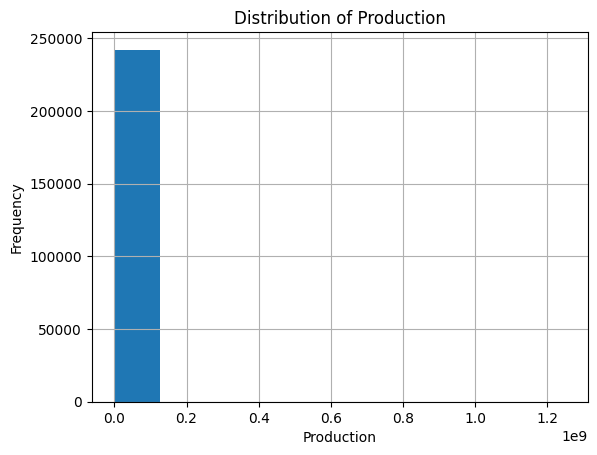

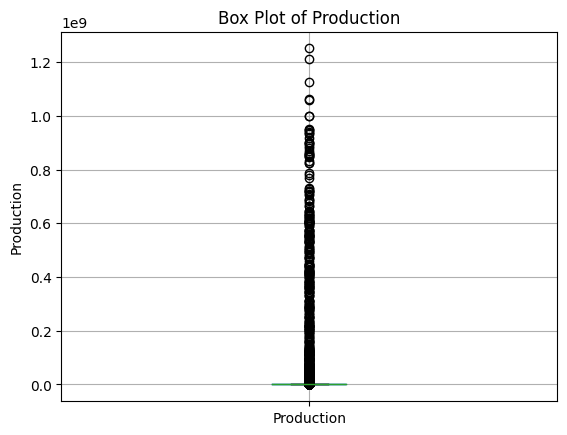

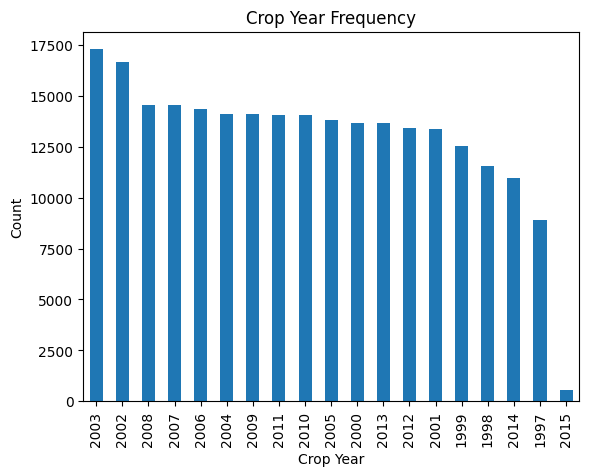

In [3]:
# Step 3: Analyze Data Distribution and Patterns
df['Production'].hist()
plt.xlabel('Production')
plt.ylabel('Frequency')
plt.title('Distribution of Production')
plt.show()

df.boxplot(column='Production')
plt.ylabel('Production')
plt.title('Box Plot of Production')
plt.show()

df['Crop_Year'].value_counts().plot(kind='bar')
plt.xlabel('Crop Year')
plt.ylabel('Count')
plt.title('Crop Year Frequency')
plt.show()



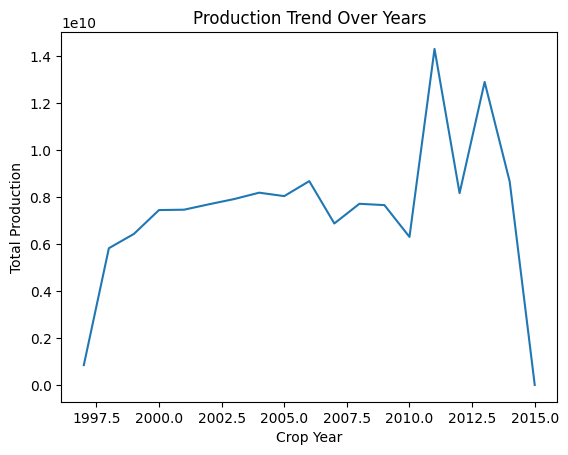

In [4]:
# Step 4: Derive Insights and Perform Further Analysis
df.groupby('Crop_Year')['Production'].sum().plot()
plt.xlabel('Crop Year')
plt.ylabel('Total Production')
plt.title('Production Trend Over Years')
plt.show()


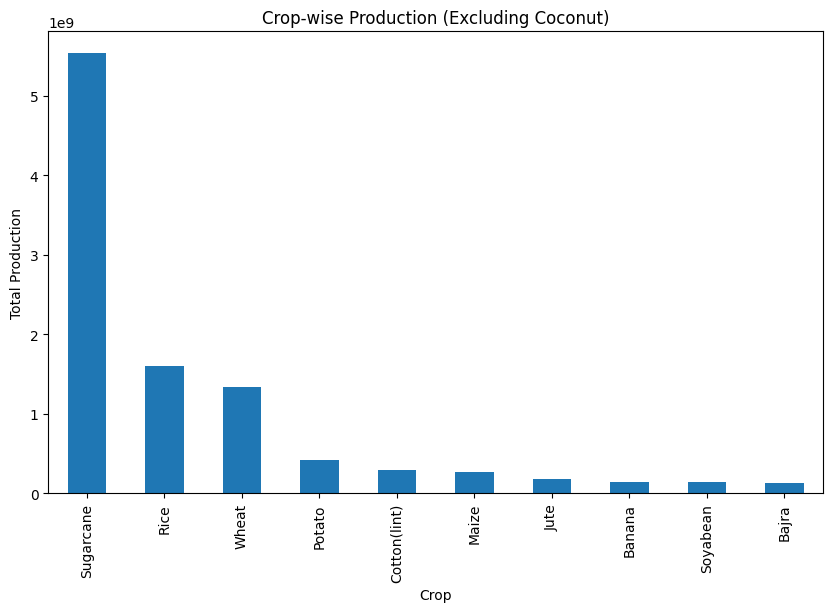

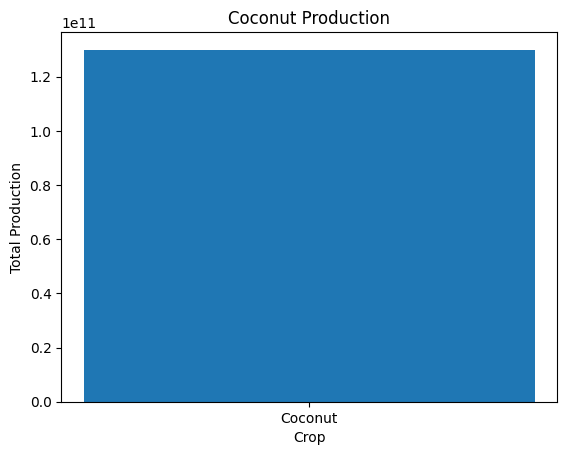

In [5]:
#Step 5: Analyze Crop Production by Crop:

# Top N Crops: Instead of plotting all the crops, we can focus on the top N crops with the highest production. 
# This will help in highlighting the major contributors while avoiding cluttering the plot with less significant crops.

## When a specific crop, such as coconut, has a significantly larger production value compared to other crops, 
## it can lead to imbalanced visualizations where the other crops' details are not clearly visible. 
## In such cases, we can handle the disparity by considering the following options:
##    1) Exclude the Outlier
##    2) Separate visualization

top_n = 10  # Choose the number of top crops to display
crop_production = df.groupby('Crop')['Production'].sum().sort_values(ascending=False)

# Exclude rows with 'Coconut' from the DataFrame
crop_production_without_coconut = crop_production[~crop_production.index.str.contains('Coconut')][:top_n]
crop_production_without_coconut.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Crop')
plt.ylabel('Total Production')
plt.title('Crop-wise Production (Excluding Coconut)')
plt.show()

# Plot for coconut production separately
crop_production_with_coconut = crop_production[crop_production.index.str.contains('Coconut')]
plt.bar('Coconut', crop_production_with_coconut)
plt.xlabel('Crop')
plt.ylabel('Total Production')
plt.title('Coconut Production')
plt.show()




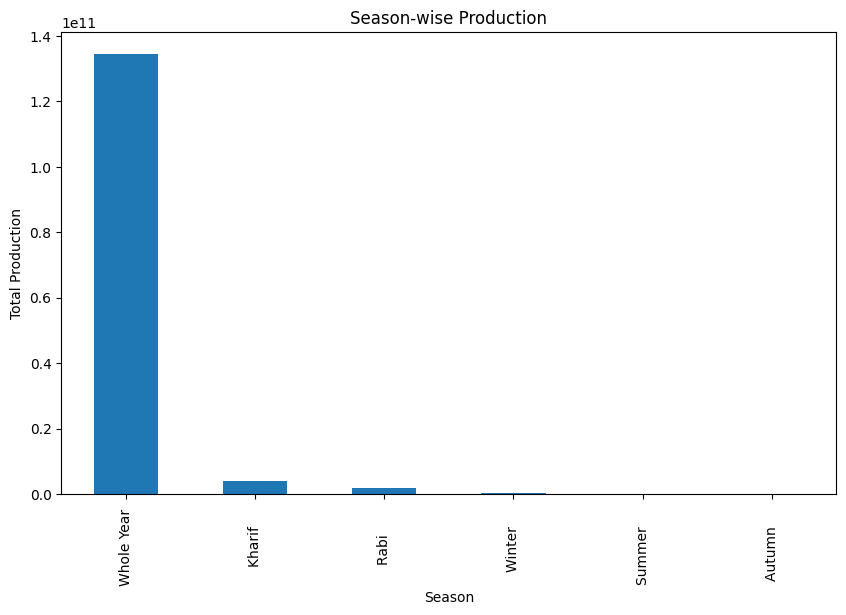

In [6]:
# Step 6: Explore Crop Production by Season:

season_production = df.groupby('Season')['Production'].sum().sort_values(ascending=False)
season_production.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Season')
plt.ylabel('Total Production')
plt.title('Season-wise Production')
plt.show()


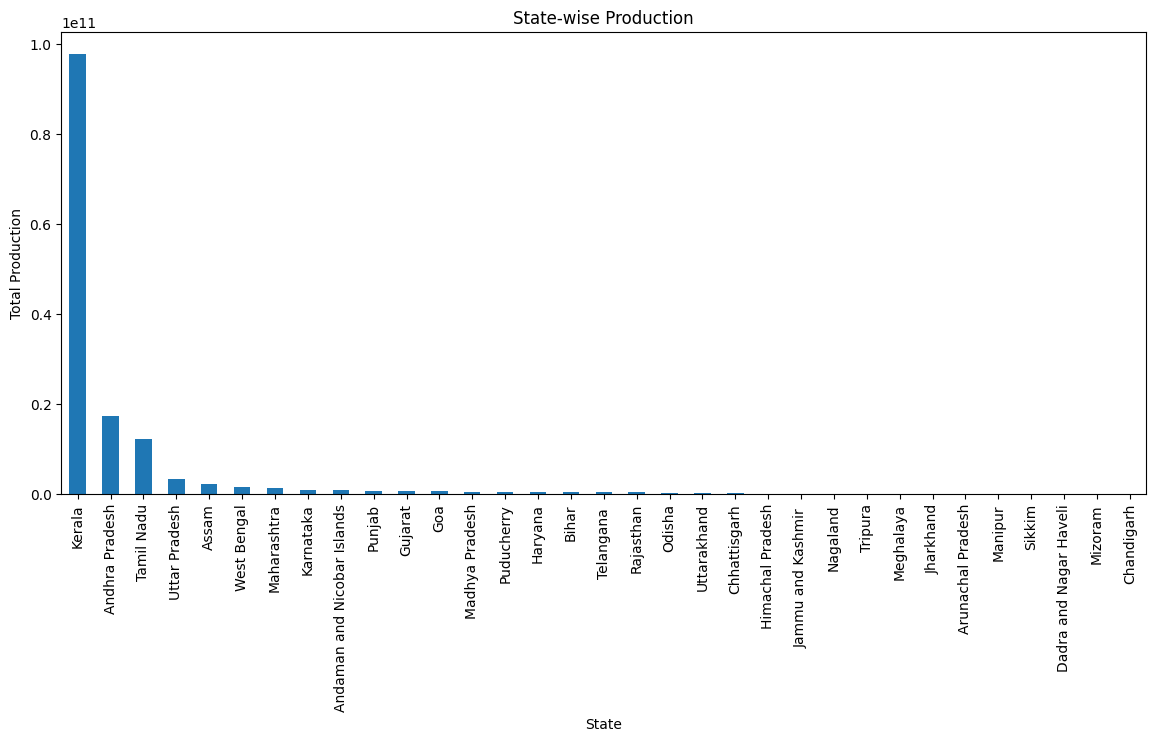

In [7]:
# Step 7: Investigate Crop Production by State:
state_production = df.groupby('State_Name')['Production'].sum().sort_values(ascending=False)
state_production.plot(kind='bar', figsize=(14, 6))
plt.xlabel('State')
plt.ylabel('Total Production')
plt.title('State-wise Production')
plt.show()


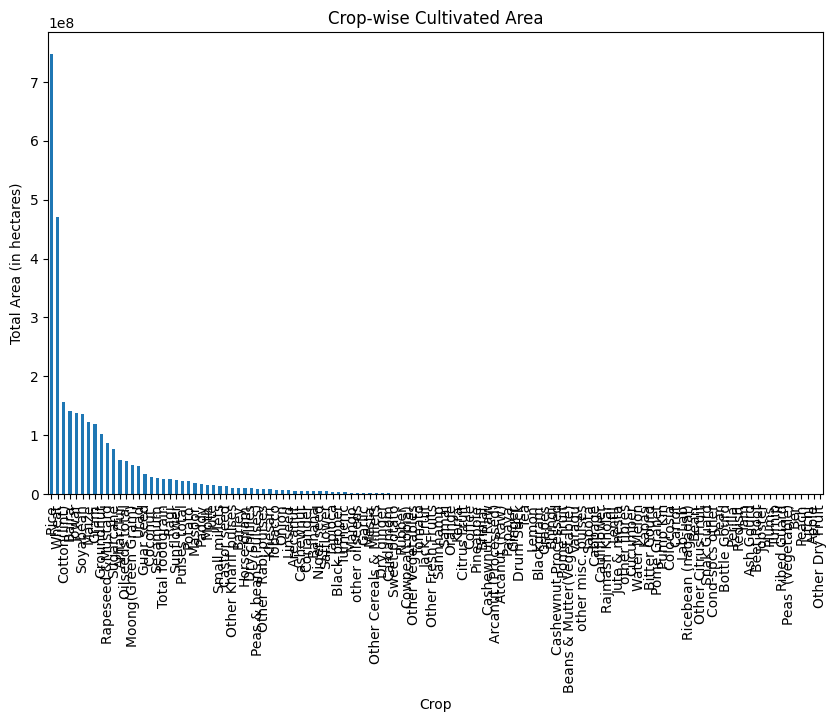

In [8]:
crop_area = df.groupby('Crop')['Area'].sum().sort_values(ascending=False)
crop_area.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Crop')
plt.ylabel('Total Area (in hectares)')
plt.title('Crop-wise Cultivated Area')
plt.show()


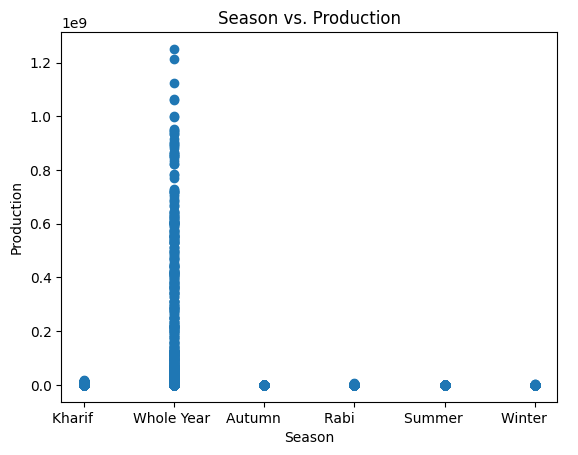

In [9]:
plt.scatter(df['Season'], df['Production'])
plt.xlabel('Season')
plt.ylabel('Production')
plt.title('Season vs. Production')
plt.show()


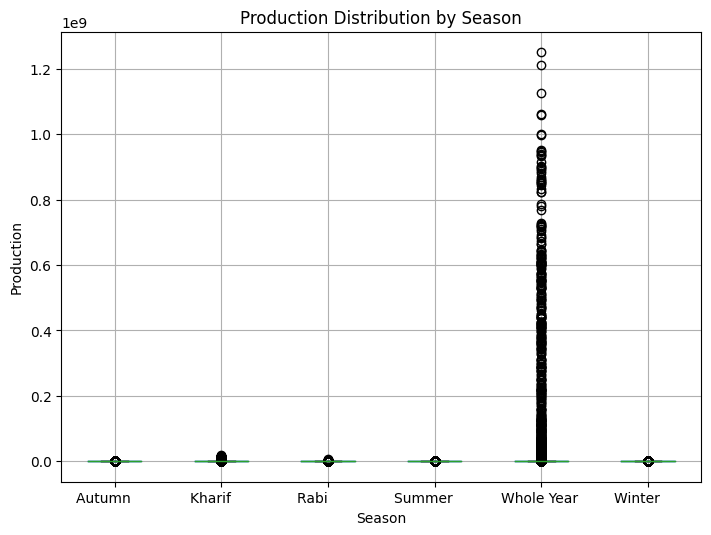

In [10]:
df.boxplot(column='Production', by='Season', figsize=(8, 6))
plt.xlabel('Season')
plt.ylabel('Production')
plt.title('Production Distribution by Season')
plt.suptitle('')  # Remove the default title
plt.show()


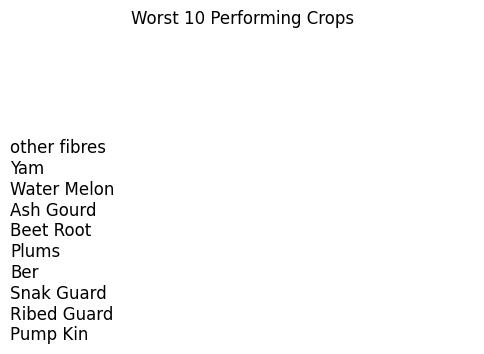

In [14]:
# Step 8: To display the worst 10 performing crops based on production:
worst_crop_production = crop_production.nsmallest(10)

plt.figure(figsize=(6, 4))
plt.axis('off')
plt.text(0, 0, '\n'.join(worst_crop_production.index), fontsize=12)
plt.title('Worst 10 Performing Crops')
plt.show()

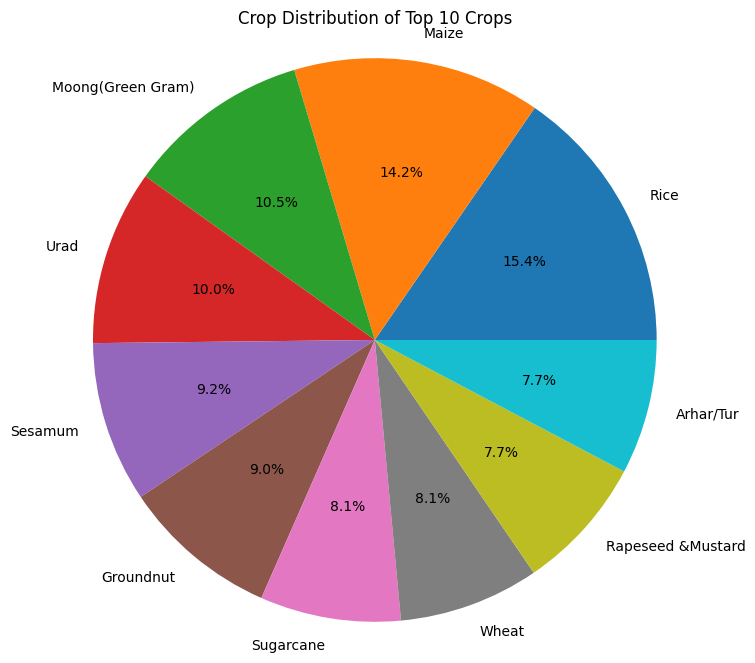

In [17]:
# Analyze Crop Distribution:
# a pie chart to visualize the distribution of crops in the dataset.
crop_distribution = df['Crop'].value_counts()[:10]

plt.figure(figsize=(8, 8))
plt.pie(crop_distribution, labels=crop_distribution.index, autopct='%1.1f%%')
plt.title('Crop Distribution of Top 10 Crops')
plt.axis('equal')
plt.show()


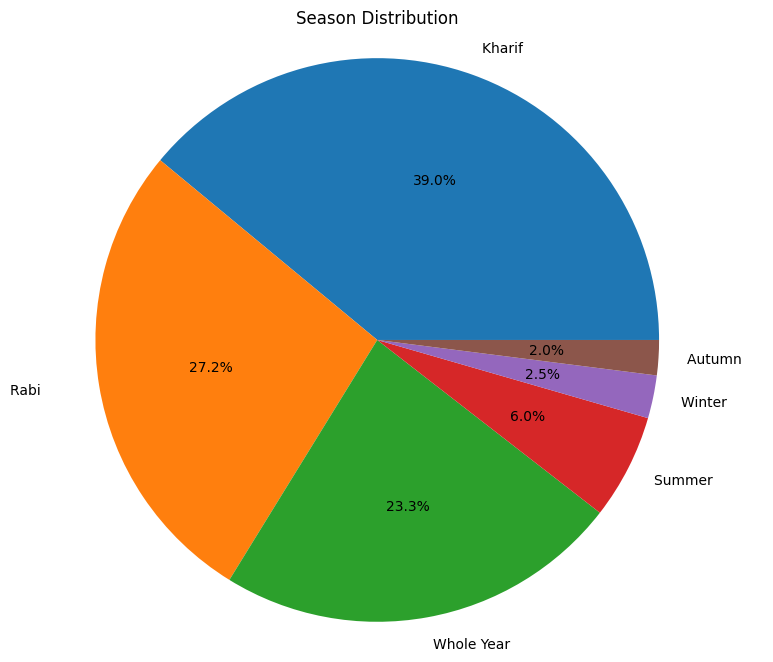

In [18]:
season_distribution = df['Season'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(season_distribution, labels=season_distribution.index, autopct='%1.1f%%')
plt.title('Season Distribution')
plt.axis('equal')
plt.show()


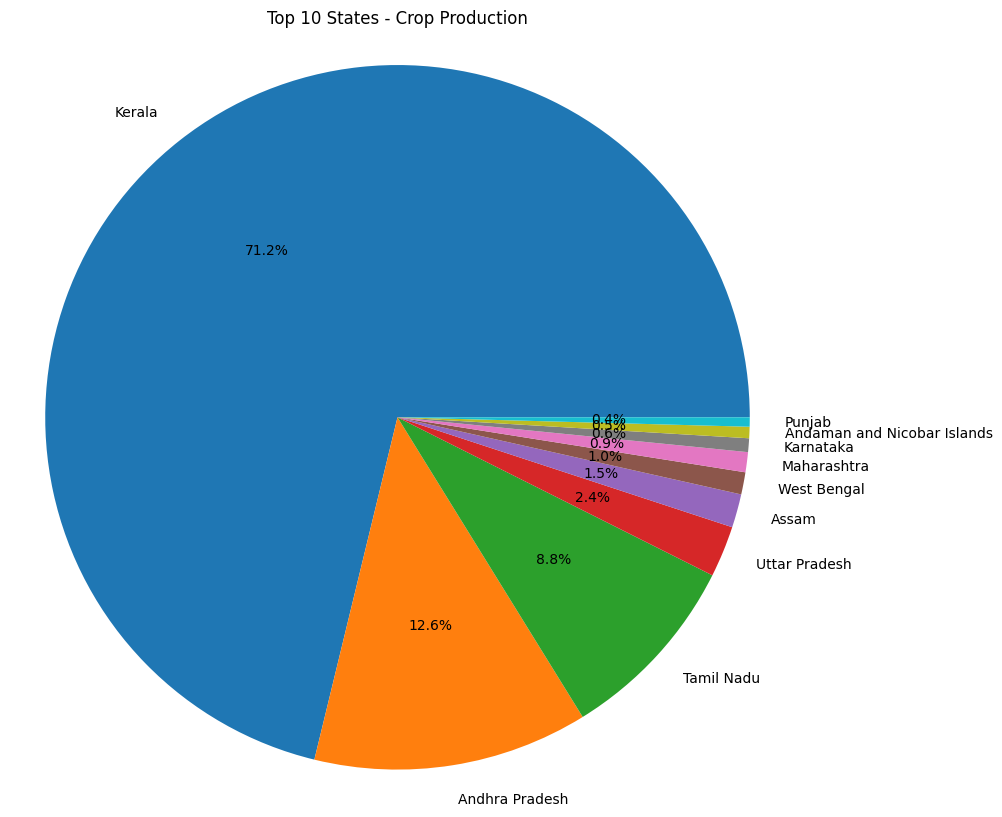

In [22]:
# TOP states in Crop production. 
state_production = df.groupby('State_Name')['Production'].sum().nlargest(10)

plt.figure(figsize=(10, 10))
plt.pie(state_production, labels=state_production.index, autopct='%1.1f%%')
plt.title('Top 10 States - Crop Production')
plt.axis('equal')
plt.show()


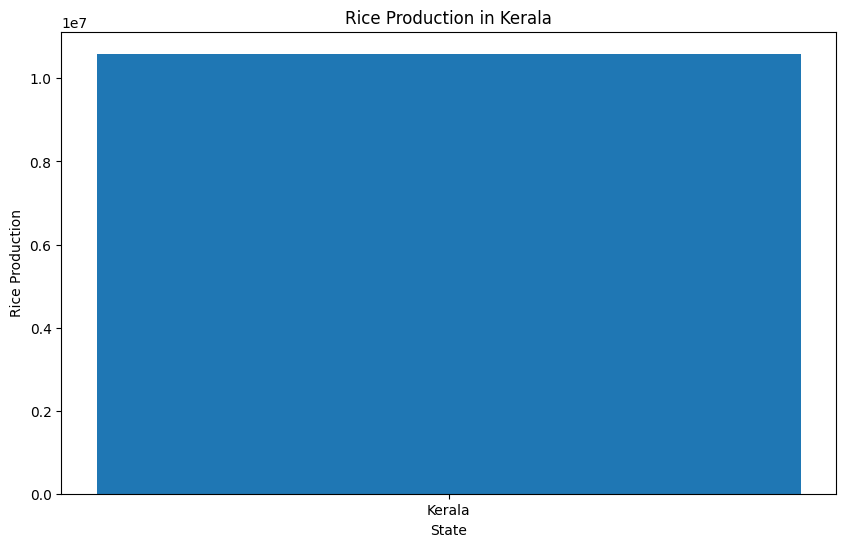

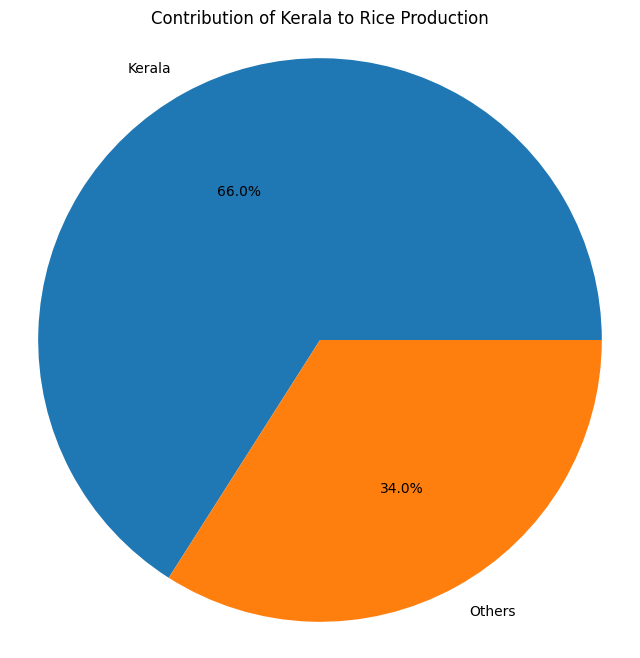

In [30]:
# Now that we know kerela has highest crop production lets get some insights on Kerela state crop production
# To visualize the crop production contribution of Kerala for rice, you can use a combination of a bar plot and a pie chart. Here's an example: 
# Filter the data for rice production in Kerala
rice_production_kerala = df[(df['Crop'] == 'Rice') & (df['State_Name'] == 'Kerala')]

# Calculate the total rice production in Kerala
total_rice_production_kerala = rice_production_kerala['Production'].sum()

# Calculate the contribution of Kerala to overall rice production
contribution_kerala = (total_rice_production_kerala / df[df['Crop'] == 'Rice']['Production'].sum())*100
contribution_kerala_percentage = contribution_kerala*100
# Bar plot for rice production in Kerala
plt.figure(figsize=(10, 6))
plt.bar('Kerala', total_rice_production_kerala)
plt.xlabel('State')
plt.ylabel('Rice Production')
plt.title('Rice Production in Kerala')
plt.show()

# Pie chart to visualize the contribution of Kerala to rice production
labels = ['Kerala', 'Others']
sizes = [contribution_kerala_percentage, 100 - contribution_kerala_percentage]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Contribution of Kerala to Rice Production')
plt.axis('equal')
plt.show()


<Figure size 1200x600 with 0 Axes>

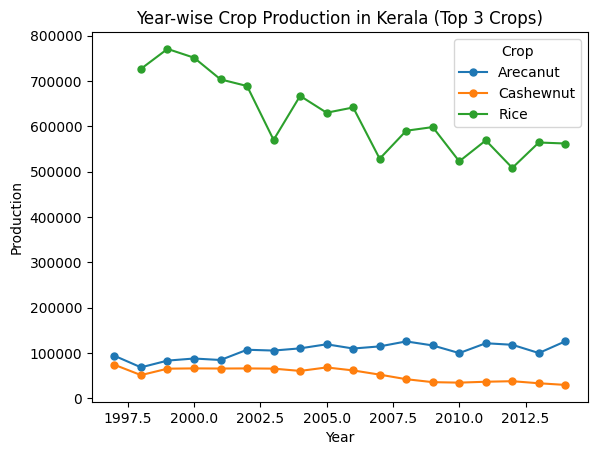

In [47]:
kerala_data = df[df['State_Name'] == 'Kerala']

top_3_crops = kerala_data['Crop'].value_counts().nlargest(3).index

crop_year_production = kerala_data[kerala_data['Crop'].isin(top_3_crops)].groupby(['Crop_Year', 'Crop'])['Production'].sum().unstack()

plt.figure(figsize=(12, 6))
crop_year_production.plot(marker='o', markersize=5)
plt.xlabel('Year')
plt.ylabel('Production')
plt.title('Year-wise Crop Production in Kerala (Top 3 Crops)')
plt.legend(title='Crop')
plt.show()


# As you can see These are some generale insights that I captured from crop production datatset. 